In [1]:
import pandas as pd
df = pd.read_csv('./CSV/Iris_Dataset.csv');
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
features = df.drop('species',axis=1)
target = df['species']

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
dfle = pd.DataFrame(features)
dfle['target'] = target
dfle.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
df0 = dfle[:50]
df1 = dfle[50:100]
df2 = dfle[100:]

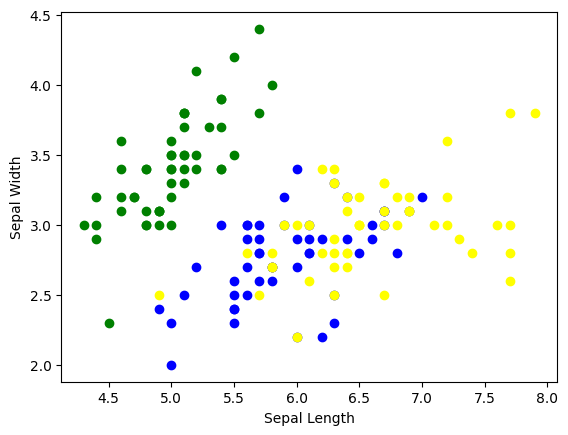

In [11]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal_length'],df0['sepal_width'],color="green")
plt.scatter(df1['sepal_length'],df1['sepal_width'],color="blue")
plt.scatter(df2['sepal_length'],df2['sepal_width'],color="yellow")

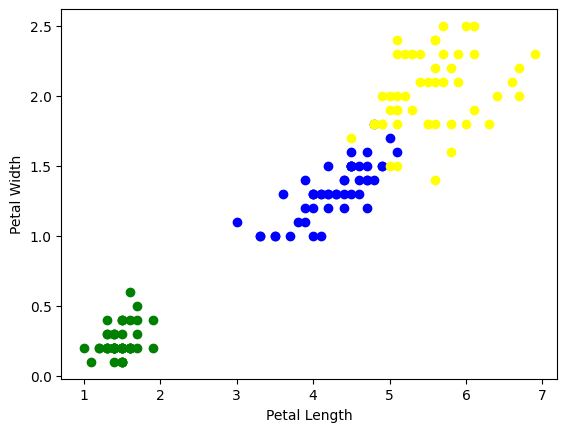

In [12]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal_length'],df0['petal_width'],color="green")
plt.scatter(df1['petal_length'],df1['petal_width'],color="blue")
plt.scatter(df2['petal_length'],df2['petal_width'],color="yellow")

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size = 0.2,random_state=1)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
knn.score(X_test,y_test)

1.0

Text(95.72222222222221, 0.5, 'Truth')

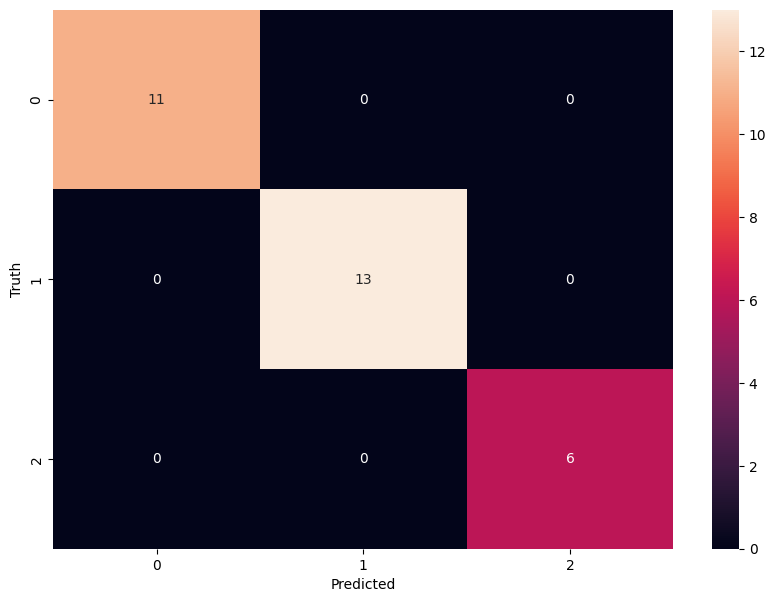

In [26]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)
%matplotlib inline
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')